<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [8]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



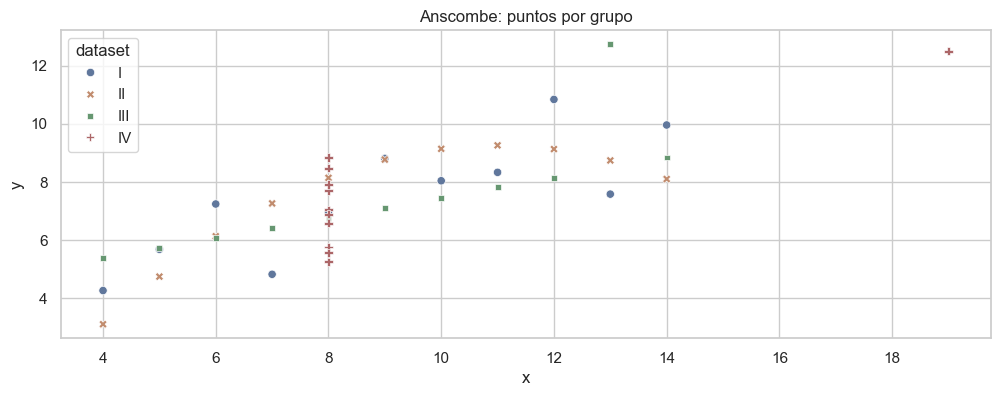

In [10]:
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.scatterplot(
    data = data,
    x='x', 
    y='y', 
    hue = 'dataset',
    style = 'dataset'
)
plt.title('Anscombe: puntos por grupo')
plt.show()

**¿puede identificar diferencias significativas entre los grupos?**


R: Sí, podemos notar, que el grupo II muestra una curvatura, el grupo III concentra casi todos los x en 8 con un outlayer en y. IV tiene una coordenada x grande que traslada la recta y por último I es aproximadamente lineal. Básicamente, los 4 grupos tienen comportamientos distintos.

**¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?**

R:
Se sugieren comportamientos distintos, puesto que cada grupo modela una curva distinta, debido a precencia de outliers.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [11]:
desc = (data.groupby('dataset')[['x','y']]
              .describe()
              .round(3))
print(desc)

            x                                            y                \
        count mean    std  min  25%  50%   75%   max count   mean    std   
dataset                                                                    
I        11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.501  2.032   
II       11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.501  2.032   
III      11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.500  2.030   
IV       11.0  9.0  3.317  8.0  8.0  8.0   8.0  19.0  11.0  7.501  2.031   

                                         
          min    25%   50%   75%    max  
dataset                                  
I        4.26  6.315  7.58  8.57  10.84  
II       3.10  6.695  8.14  8.95   9.26  
III      5.39  6.250  7.11  7.98  12.74  
IV       5.25  6.170  7.04  8.19  12.50  


Es notable que las medidas de posición y dispersión son iguales en los 4 grupos, por lo tanto, al intentar generar un modelo lineal con estos datos darán rectas idénticas y por lo tanto, las predicciones no serán precisas.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



--- Dataset I ---
MSE: 1.2512
R²: 0.6665


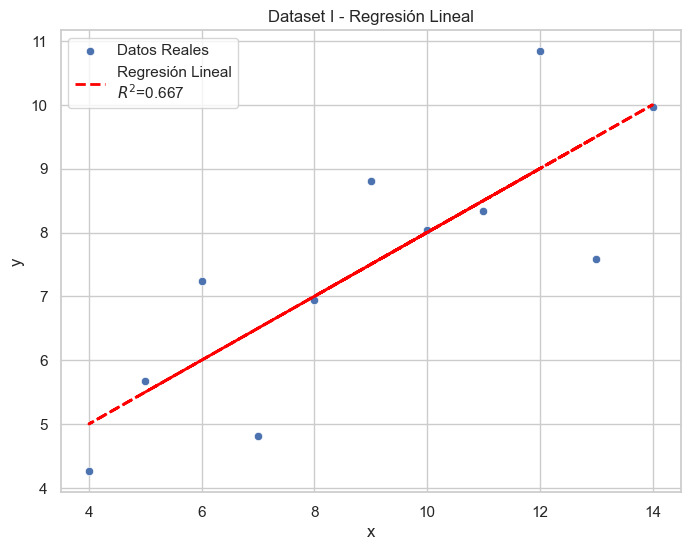

--- Dataset II ---
MSE: 1.2524
R²: 0.6662


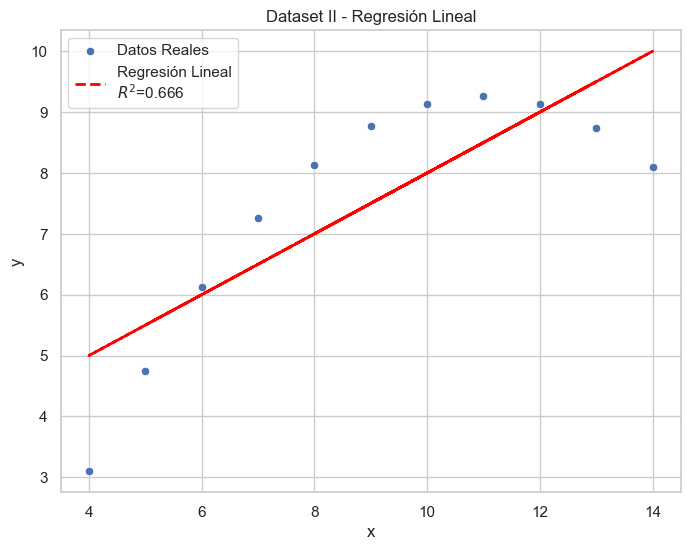

--- Dataset III ---
MSE: 1.2506
R²: 0.6663


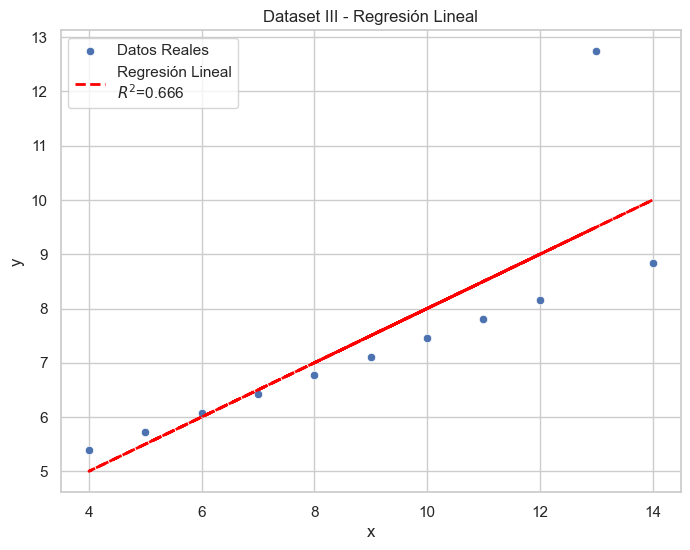

--- Dataset IV ---
MSE: 1.2493
R²: 0.6667


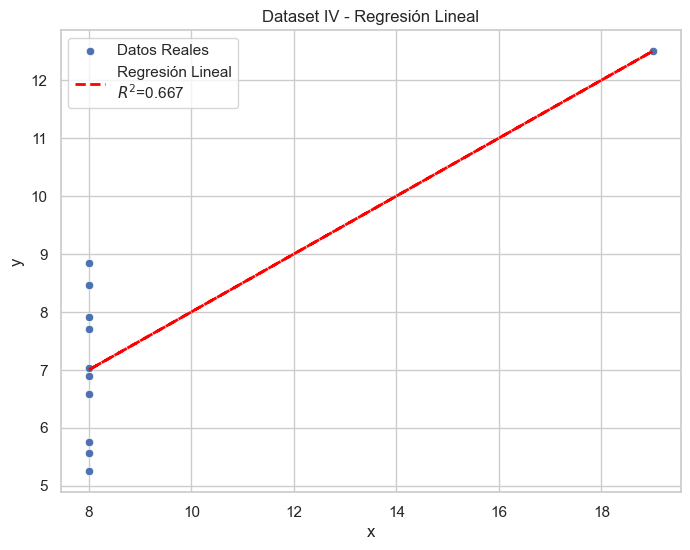


--- Resumen de Métricas de Regresión ---
  Dataset  Coeficiente (Pendiente)  Intercepto    MSE     R2
0       I                      0.5       3.000  1.251  0.667
1      II                      0.5       3.001  1.252  0.666
2     III                      0.5       3.002  1.251  0.666
3      IV                      0.5       3.002  1.249  0.667


In [16]:

# Configuración de los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Resultados del ajuste: Almacenaremos las métricas para la tabla de resumen
resultados_metricas = []

# Ajustar un modelo de regresión lineal para cada grupo y calcular métricas
for dataset_name in data['dataset'].unique():
    subset = data[data['dataset'] == dataset_name]

    # X debe ser 2D para sklearn, Y es 1D
    X = subset[['x']]
    y = subset['y']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    # Calcular métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Almacenar métricas
    resultados_metricas.append({
        'Dataset': dataset_name,
        'Coeficiente (Pendiente)': model.coef_[0],
        'Intercepto': model.intercept_,
        'MSE': mse,
        'R2': r2
    })
    
    # Imprimir resultados numéricos por grupo
    print(f"--- Dataset {dataset_name} ---")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Generar gráfico (basado en tu código de referencia)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='x', y='y', data=subset, label='Datos Reales')
    plt.plot(X, y_pred, color='red', linestyle='--', linewidth=2, label=f'Regresión Lineal\n$R^2$={r2:.3f}')
    plt.title(f'Dataset {dataset_name} - Regresión Lineal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Resumen de todas las métricas
df_metricas = pd.DataFrame(resultados_metricas)
print("\n--- Resumen de Métricas de Regresión ---")
print(df_metricas.round(3))

Para el grupo I el R^2 es cercano a 0.67 lo cual indica que el modelo explica el 67% de la varianza. El MSE es razonablemente bajo por lo que se explica una relación lineal entre los datos. Luego para el grupo II, III, IV aunque el R^2 es similar al grupo I, sin embargo, desde la visualización podemos deducir que el comportamiento de los datos no son lineales y están influenciados por la precencia de outliers para los últimos grupos, por lo tanto, estas medidas no son suficientes como determinadores de los modelos por tanto se necesitan estrategías mas sofisticadas para cada grupo de datos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

--- Dataset I (OLS) ---
MSE: 1.2512, R²: 0.6665


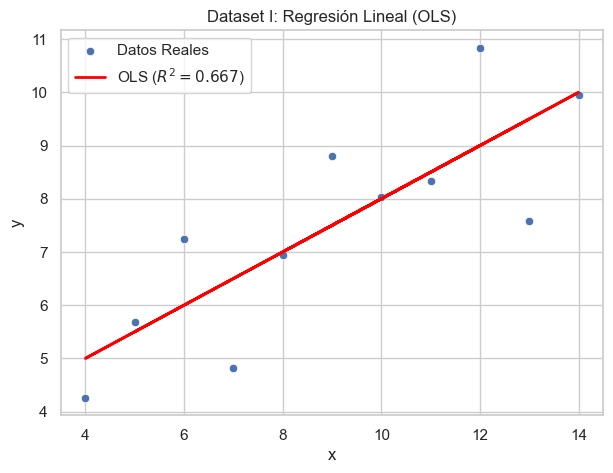

In [21]:
# Preparar los datos del Dataset I
data = sns.load_dataset("anscombe")
subset_I = data[data['dataset'] == 'I']
X_I = subset_I[['x']]
y_I = subset_I['y']

# Ajuste: Regresión Lineal Simple (OLS)
model_I = LinearRegression()
model_I.fit(X_I, y_I)
y_pred_I = model_I.predict(X_I)

# Métricas
mse_I = mean_squared_error(y_I, y_pred_I)
r2_I = r2_score(y_I, y_pred_I)

print(f"--- Dataset I (OLS) ---")
print(f"MSE: {mse_I:.4f}, R²: {r2_I:.4f}")

# Gráfico
plt.figure(figsize=(7, 5))
sns.scatterplot(x='x', y='y', data=subset_I, label='Datos Reales')
plt.plot(X_I, y_pred_I, color='red', linestyle='-', linewidth=2, 
         label=f'OLS ($R^2={r2_I:.3f}$)')
plt.title('Dataset I: Regresión Lineal (OLS)')
plt.legend()
plt.show()

--- Dataset II (Polinómica) ---
MSE: 0.0000, R²: 1.0000


C:\Users\William\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


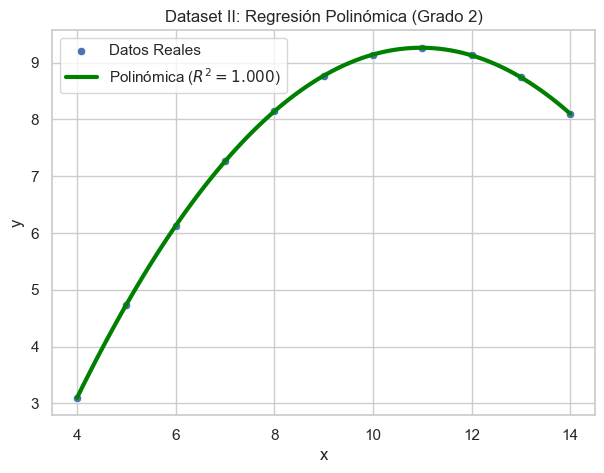

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparar los datos del Dataset II
data = sns.load_dataset("anscombe")
subset_II = data[data['dataset'] == 'II']
X_II = subset_II[['x']]
y_II = subset_II['y']

# Ajuste: Regresión Polinómica (Grado 2)
poly_model_II = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_II.fit(X_II, y_II)
y_pred_poly_II = poly_model_II.predict(X_II)

# Métricas
mse_poly_II = mean_squared_error(y_II, y_pred_poly_II)
r2_poly_II = r2_score(y_II, y_pred_poly_II)

print(f"--- Dataset II (Polinómica) ---")
print(f"MSE: {mse_poly_II:.4f}, R²: {r2_poly_II:.4f}")

# Gráfico (Necesita puntos de referencia suaves para la curva)
plt.figure(figsize=(7, 5))
sns.scatterplot(x='x', y='y', data=subset_II, label='Datos Reales')

# Puntos suaves para trazar la curva
X_ref = np.linspace(X_II.min(), X_II.max(), 100).reshape(-1, 1)
y_pred_curve = poly_model_II.predict(X_ref)

plt.plot(X_ref, y_pred_curve, color='green', linestyle='-', linewidth=3,
         label=f'Polinómica ($R^2={r2_poly_II:.3f}$)')
plt.title('Dataset II: Regresión Polinómica (Grado 2)')
plt.legend()
plt.show()


--- Dataset III (Huber Regressor) ---
R² OLS (Sesgado): 0.6663
R² Huber (Robusto): 0.5633, MSE: 1.6368

--- Dataset IV (Huber Regressor) ---
R² OLS (Sesgado): 0.6667
R² Huber (Robusto): 0.6666, MSE: 1.2497


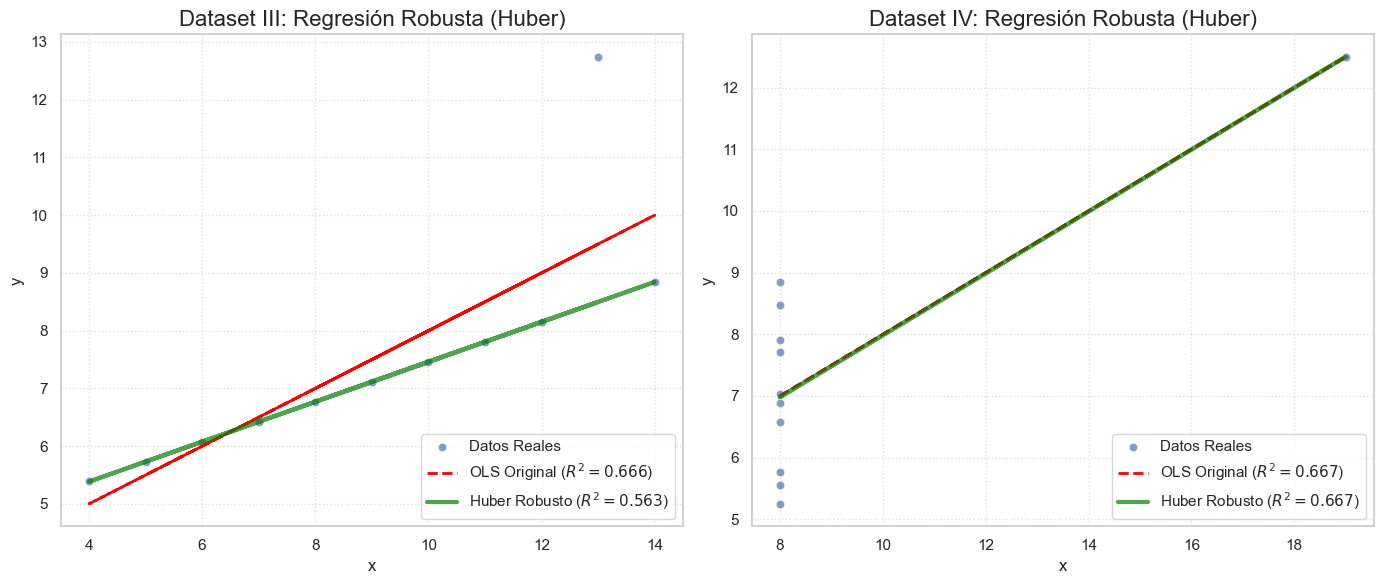

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = sns.load_dataset("anscombe")

grupos_outlier = ['III', 'IV']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, nombre_grupo in enumerate(grupos_outlier):
    subset = data[data['dataset'] == nombre_grupo]
    X = subset[['x']]
    y = subset['y']

    # Modelo OLS (Referencia para ver el sesgo)
    model_ols = LinearRegression().fit(X, y)
    y_pred_ols = model_ols.predict(X)
    r2_ols = r2_score(y, y_pred_ols)

    # Ajuste: Regresión Robusta (Huber Regressor)
    model_huber = HuberRegressor(epsilon=1.35, max_iter=1000) # epsilon=1.35 es el valor por defecto
    model_huber.fit(X, y)
    y_pred_huber = model_huber.predict(X)
    
    # Métricas
    r2_huber = r2_score(y, y_pred_huber)
    mse_huber = mean_squared_error(y, y_pred_huber)

    print(f"\n--- Dataset {nombre_grupo} (Huber Regressor) ---")
    print(f"R² OLS (Sesgado): {r2_ols:.4f}")
    print(f"R² Huber (Robusto): {r2_huber:.4f}, MSE: {mse_huber:.4f}")
    
    # Gráfico
    ax = axes[i]
    sns.scatterplot(x='x', y='y', data=subset, label='Datos Reales', alpha=0.7, ax=ax)
    
    # OLS Original (línea sesgada)
    ax.plot(X, y_pred_ols, color='red', linestyle='--', linewidth=2, 
            label=f'OLS Original ($R^2={r2_ols:.3f}$)')
            
    # Huber Robusta (línea que ignora el outlier)
    ax.plot(X, y_pred_huber, color='green', linestyle='-', linewidth=3, alpha=0.7, 
            label=f'Huber Robusto ($R^2={r2_huber:.3f}$)')

    ax.set_title(f'Dataset {nombre_grupo}: Regresión Robusta (Huber)', fontsize=16)
    ax.legend(loc='lower right')
    ax.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()